In [2]:
import os
import warnings

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from utils.emissions import estimate_maf, formula_maf_afr

In [39]:
polo_branco_s20_A = pd.read_csv("../data/s20/polo_branco/A/2025-04-03 10_03_38.csv")
polo_branco_s20_B = pd.read_csv("../data/s20/polo_branco/B/2025-04-02 14_17_30.csv")

polo_branco_s24_A = pd.read_csv("../data/s24/polo_branco/A/2025-04-01 10_34_43.csv")
polo_branco_s24_B = pd.read_csv("../data/s24/polo_branco/B/2025-04-01 10_22_25.csv")

In [40]:
polo_prata_s20_A = pd.read_csv("../data/s20/polo_prata/A/2025-04-03 13_15_42.csv")
polo_prata_s20_B = pd.read_csv("../data/s20/polo_prata/B/2025-04-03 13_27_47.csv")

polo_prata_s24_A = pd.read_csv("../data/s24/polo_prata/A/2025-04-03 09_38_48.csv")
polo_prata_s24_B = pd.read_csv("../data/s24/polo_prata/B/2025-04-03 09_49_51.csv")

In [41]:
data = pd.concat([
    polo_branco_s24_B,
    polo_branco_s24_A,
    polo_branco_s20_B,
    polo_prata_s24_A,
    polo_prata_s24_B,
    polo_branco_s20_A,
    polo_prata_s20_A,
    polo_prata_s20_B
], ignore_index=True)

In [42]:
data

,Device,Usuario,SessionDate,TimeSensor,Vin,Latitude,Longitude,Accelerometer_X,Accelerometer_Y,Accelerometer_Z,...,EthanolPercentage,RelativeThrottlePos,AcceleratorPedalPosD,AcceleratorPedalPosE,AbsoluterThrottlePosB,CatalystTempBank1Sensor1,EngineFuelRate,AbsoluteLoadValue,AirFuelRatio,AbsoluteBarometricPressure
0,29a4771000b0afa3,mariannedinizsi@gmail.com,2025-04-01 10:22:25,2025-04-01 10:22:26.826389,9BWAH5BZ6KP538191,0.000000,0.000000,0.524028,5.716453,7.243074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29a4771000b0afa3,mariannedinizsi@gmail.com,2025-04-01 10:22:25,2025-04-01 10:22:27.826002,9BWAH5BZ6KP538191,0.000000,0.000000,0.071785,5.950950,8.315059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,29a4771000b0afa3,mariannedinizsi@gmail.com,2025-04-01 10:22:25,2025-04-01 10:22:28.824849,9BWAH5BZ6KP538191,0.000000,0.000000,0.748953,5.321638,7.800602,...,26.27,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,29a4771000b0afa3,mariannedinizsi@gmail.com,2025-04-01 10:22:25,2025-04-01 10:22:29.825724,9BWAH5BZ6KP538191,0.000000,0.000000,0.418744,5.682954,8.525627,...,26.27,6.0,16.0,15.0,16.0,291.5,0.0,38.0,NaN,NaN
4,29a4771000b0afa3,mariannedinizsi@gmail.com,2025-04-01 10:22:25,2025-04-01 10:22:30.825581,9BWAH5BZ6KP538191,-5.842995,-35.197392,0.961915,5.615955,7.267003,...,26.27,6.0,16.0,15.0,16.0,291.5,0.0,38.0,1.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4621,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-04-03 13:27:47,2025-04-03 13:38:43.515727,9BWAH5BZ4KP599863,-5.843003,-35.197530,-3.035595,5.583054,7.840682,...,26.27,11.0,22.0,22.0,22.0,637.6,0.0,44.0,1.0,100.0
4622,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-04-03 13:27:47,2025-04-03 13:38:44.516035,9BWAH5BZ4KP599863,-5.843003,-35.197530,-2.805884,4.974977,7.507780,...,26.27,11.0,22.0,22.0,22.0,637.6,0.0,44.0,1.0,100.0
4623,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-04-03 13:27:47,2025-04-03 13:38:45.516393,9BWAH5BZ4KP599863,-5.843003,-35.197530,-0.974477,4.766503,8.254939,...,26.27,5.0,15.0,15.0,22.0,637.6,0.0,44.0,1.0,100.0
4624,9c3c7b3649031573,hilton.thallyson@gmail.com,2025-04-03 13:27:47,2025-04-03 13:38:46.516279,9BWAH5BZ4KP599863,-5.842865,-35.197373,-2.772384,4.601398,7.859824,...,26.27,5.0,15.0,15.0,17.0,638.5,0.0,43.0,1.0,100.0


In [43]:
data["AirFuelRatio"].describe()

count    4592.000000
mean        1.086486
std         0.307531
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.999969
Name: AirFuelRatio, dtype: float64

In [44]:
data["Maf"].describe()

count    4621.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: Maf, dtype: float64

In [45]:
data.columns

Index(['Device', 'Usuario', 'SessionDate', 'TimeSensor', 'Vin', 'Latitude',
       'Longitude', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z',
       'Magnitude', 'TedaFlag', 'RadarArea', 'DriverBehaviour',
       'CityRoadLabel', 'CityRoadProb', 'FuelType',
       'FuelPredictionProbability', 'FuelModelPredictionTime(microseconds)',
       'TedaModelPredictionTime(microseconds)',
       'DriveBehaviourModelPredictionTime(microseconds)',
       'CityRoadModelPredictionTime(microseconds)', 'TimesDisconnected',
       'ReconnectionCount', 'Speed', 'RPM', 'EngineLoad', 'EngineOilTemp',
       'CoolantTemp', 'Maf', 'ThrottlePos', 'VoltageControlModule',
       'FuelLevel', 'FuelPressure', 'FuelRailPressure',
       'FuelRailGaugePressure', 'IntakeMAP', 'TimingAdvance',
       'RuntimeSinceEngineStart', 'DistanceTraveledWithMILOn',
       'IntakeAirTemperature', 'EthanolPercentage', 'RelativeThrottlePos',
       'AcceleratorPedalPosD', 'AcceleratorPedalPosE', 'AbsoluterThrottlePos

In [47]:
data["Maf_estimated"] = estimate_maf(
    data["RPM"],
    data["IntakeAirTemperature"],
    data["IntakeMAP"],
    1.0
)

In [49]:
_, data["co2"] = formula_maf_afr(
    data["AirFuelRatio"],
    data["Maf_estimated"],
    "Gasolina"
)

In [50]:
data["co2"] = data["co2"].fillna(data["co2"].median())

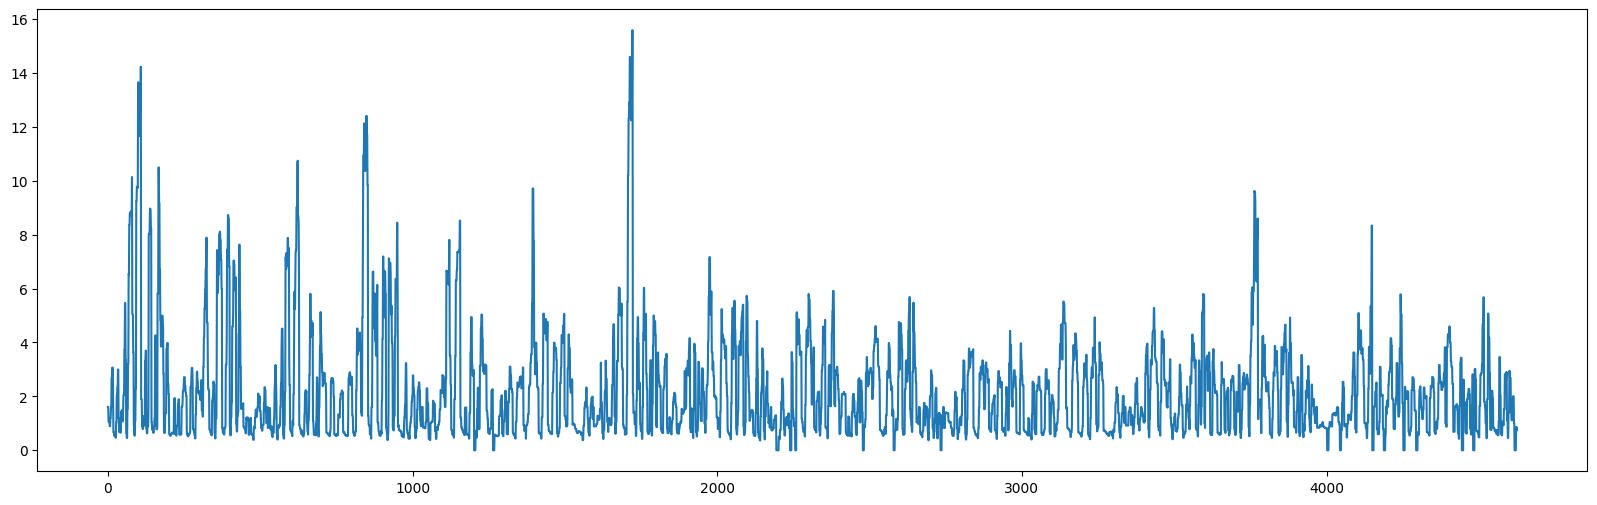

In [52]:
plt.figure(figsize=(20, 6))

data["co2"].plot()

plt.show()

In [54]:
data["co2"].to_csv("../data/co2.csv", index=False)